In [39]:
#Importing libraries

from sklearn.model_selection        import train_test_split
from sklearn.tree                   import DecisionTreeRegressor
from sklearn.tree                   import export_graphviz
from sklearn.neighbors              import KNeighborsRegressor
from sklearn.metrics                import mean_squared_error
from sklearn.linear_model           import LinearRegression
from math                           import sqrt

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt



In [21]:
#Reading Dataset

lv_longley_df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/d20fcb6402ae34e653d4513b00f39257bb37ed7f/longley.csv")

lv_longley_df.columns = ["GNP.deflator","GNP","Unemployed","Armed.Forces","Population","Year","Employed"]


In [22]:
#Displaying the characteristics of the longley data set

print("The dimension of the data set is:",lv_longley_df.shape)
print("The names of the variables in the data set are :\n",lv_longley_df.columns)
print("The information of the data set are:\n",lv_longley_df.info())

The dimension of the data set is: (15, 7)
The names of the variables in the data set are :
 Index(['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Population',
       'Year', 'Employed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GNP.deflator  15 non-null     float64
 1   GNP           15 non-null     float64
 2   Unemployed    15 non-null     float64
 3   Armed.Forces  15 non-null     float64
 4   Population    15 non-null     float64
 5   Year          15 non-null     int64  
 6   Employed      15 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 968.0 bytes
The information of the data set are:
 None


In [23]:
#Determining Null values

print("Null values in dataset:\n",lv_longley_df.isnull().sum())
print("Not available values in the data set are:\n",lv_longley_df.isna().sum())

Null values in dataset:
 GNP.deflator    0
GNP             0
Unemployed      0
Armed.Forces    0
Population      0
Year            0
Employed        0
dtype: int64
Not available values in the data set are:
 GNP.deflator    0
GNP             0
Unemployed      0
Armed.Forces    0
Population      0
Year            0
Employed        0
dtype: int64


In [24]:
#Using a random seed function for generating the same data set

np.random.seed(3000)

lv_training,lv_test = train_test_split(lv_longley_df,test_size = 0.3)

lv_x_train = lv_training.drop(["Employed"],axis = 1)
lv_y_train = lv_training["Employed"]

lv_x_test = lv_test.drop(["Employed"],axis = 1)
lv_y_test = lv_test["Employed"]

In [25]:
#Creating a decision tree model

print("-------------DECISION TREE MODEL---------------")

lv_tree_longley = DecisionTreeRegressor(random_state = 0)
lv_tree_longley.fit(lv_x_train,lv_y_train)

-------------DECISION TREE MODEL---------------


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [27]:
#Determining the importance of the predictor variables

print("The importance of features of decision tree model for longly data set:\n",
     lv_tree_longley.feature_importances_)

The importance of features of decision tree model for longly data set:
 [2.55359834e-02 7.08778119e-01 2.56663176e-05 0.00000000e+00
 6.53524589e-03 2.59124985e-01]


In [28]:
#Creating a visual model of decision tree algorithm

export_graphviz(lv_tree_longley,out_file = "longley.dot",feature_names = lv_x_train.columns,
               impurity = False ,filled = True )

In [30]:
#Calculate RMSE for the model

lv_tree_longley_rmse = sqrt(mean_squared_error(lv_y_test,lv_tree_longley.predict(lv_x_test))
                    )
print("The RMSE value for Decision tree is :",lv_tree_longley_rmse)

The RMSE value for Decision tree is : 1.500712097638979


In [31]:
#Creating a new decision tree model for specified depth

print("----------------------NEW DECISION TREE MODEL--------------------")

lv_tree_longley_new = DecisionTreeRegressor(max_depth = 3,random_state = 0)
lv_tree_longley_new.fit(lv_x_train,lv_y_train)

----------------------NEW DECISION TREE MODEL--------------------


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

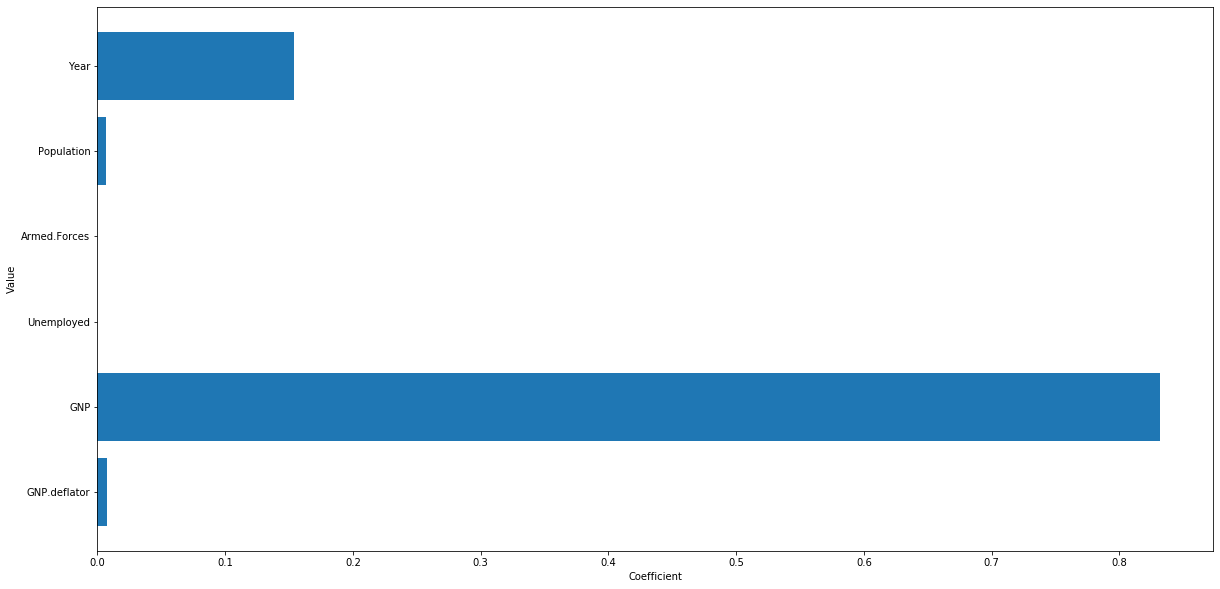

In [37]:
#Displaying importance of each variable in decision tree

plt.figure(1,figsize = (20,10))
plt.yticks(range(0,6),lv_x_train.columns)
plt.barh(range(0,6),lv_tree_longley_new.feature_importances_ ,align = 'center')
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.show()

In [38]:
#Calculate RMSE for the new decision tree model

lv_tree_pred2 = sqrt(mean_squared_error(lv_y_test,lv_tree_longley_new.predict(lv_x_test))
                    )
print("RMSE value for a new Decision Tree model is :",lv_tree_pred2)

RMSE value for a new Decision Tree model is : 0.866997001148214


In [41]:
#Creating a linear regression model

print("-----------------LINEAR REGRESSION MODEL-------------------")

lv_lin_longley = LinearRegression()
lv_lin_longley.fit(lv_x_train,lv_y_train)
lv_lin_longley_rmse = sqrt(mean_squared_error(lv_y_test,lv_lin_longley.predict(lv_x_test)))

print("Coefficient of independent variables in the model is:\n",lv_lin_longley.coef_)
print("Intercept in the model is:",lv_lin_longley.intercept_)
print("RMSE value for Linear Regression model is :",lv_lin_longley_rmse)


-----------------LINEAR REGRESSION MODEL-------------------
Coefficient of independent variables in the model is:
 [ 0.22034627 -0.06237809 -0.02253421 -0.01429506 -0.69409218  2.89341541]
Intercept in the model is: -5495.810320934462
RMSE value for Linear Regression model is : 1.043028714575896


------------------------KNN MODEL--------------------
RMSE value for k1 k is 1.500712097638979
RMSE value for k2 k is 1.552361040479958
RMSE value for k3 k is 1.9290391390534347
RMSE value for k4 k is 2.2745948128183198
RMSE value for k5 k is 2.972287389873328
RMSE value for k6 k is 3.5268851263465417
RMSE value for k7 k is 3.970421704328659
RMSE value for k8 k is 4.072079925004545
RMSE value for k9 k is 4.362454078006563
RMSE value for k10 k is 4.68427044479715
The Least RMSE value using KNN is : 1.500712097638979


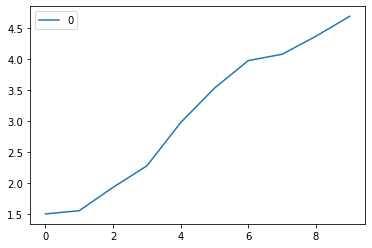

In [42]:
#Creating a KNN Model

print("------------------------KNN MODEL--------------------")

lv_knn_rmse_list = []

for k in range(10):
    k = k + 1
    lv_knn_longley = KNeighborsRegressor(n_neighbors=k)
    lv_knn_longley.fit(lv_x_train,lv_y_train)
    lv_knn_longley_rmse = sqrt(mean_squared_error(lv_y_test,lv_knn_longley.predict(lv_x_test)))
    print("RMSE value for k{0} k is {1}".format(k,lv_knn_longley_rmse))
    lv_knn_rmse_list.append(lv_knn_longley_rmse)
    

print("The Least RMSE value using KNN is :",min(lv_knn_rmse_list))

lv_curve = pd.DataFrame(lv_knn_rmse_list)
lv_curve.plot()